In [1]:
#En primera instancia, importare las librerías que utilizaré para desarrollar este desafío
import pandas as pd
import numpy as np
from datetime import datetime, time
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from funciones import *
warnings.filterwarnings("ignore", category=FutureWarning)


In [2]:
#Se crea un dataframe con el archivo en cuestión y se revisa el estado (df.head()).
df= pd.read_csv(r'C:\Users\4615018\Desktop\Latam\desaf\Challenge_Data_Scientist_LATAM\dataset_SCL.csv', low_memory=False)
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


### Variables

- Fecha-I: Scheduled date and time of the flight.
- Vlo-I : Scheduled flight number.
- Ori-I : Programmed origin city code.
- Des-I : Programmed destination city code.
- Emp-I : Scheduled flight airline code.
- Fecha-O : Date and time of flight operation.
- Vlo-O : Flight operation number of the flight.
- Ori-O : Operation origin city code
- Des-O : Operation destination city code.
- Emp-O : Airline code of the operated flight.
- DIA: Day of the month of flight operation.
- MES : Number of the month of operation of the flight.
- AÑO : Year of flight operation.
- DIANOM : Day of the week of flight operation.
- TIPOVUELO : Type of flight, I =International, N =National.
- OPERA : Name of the airline that operates.
- SIGLAORI: Name city of origin.
- SIGLADES: Destination city name.

In [3]:
#Se revisa la existencia de valores NaN en nuestro set datos.
val_nan = df.isna().sum()
print(val_nan)


Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        1
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64


In [4]:
#Se procede a eliminar aquellas rows donde se encuentran valores vacíos (solo 1).
df2 = df.dropna(axis=0)
df2.head()


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [5]:
#Observaremos los tipos de datos que tenemos en nuestro dataframe.
df.dtypes

Fecha-I      object
Vlo-I        object
Ori-I        object
Des-I        object
Emp-I        object
Fecha-O      object
Vlo-O        object
Ori-O        object
Des-O        object
Emp-O        object
DIA           int64
MES           int64
AÑO           int64
DIANOM       object
TIPOVUELO    object
OPERA        object
SIGLAORI     object
SIGLADES     object
dtype: object

In [6]:
#Revisamos el tamaño de nuestro dataset tanto de la cantidad de rows como columnas.
df2.shape

(68205, 18)

In [7]:
#Crearé 3 listas con variables de origin city code, departure city code y flight airline code con la intención de entender si existen variables que me esten entregando la misma info.
origen = ['Ori-I','Ori-O','SIGLAORI']
des = ['Des-I','Des-O','SIGLADES']
emp = ['Emp-O','Emp-I','OPERA']


In [8]:
#Se aplicará una función para conocer la distribución porcentual las variables de la lista origen
distribucion_porcentual(df2,origen)

Distribución porcentual de la variable 'Ori-I':
SCEL    100.0
Name: Ori-I, dtype: float64
Distribución porcentual de la variable 'Ori-O':
SCEL    100.0
Name: Ori-O, dtype: float64
Distribución porcentual de la variable 'SIGLAORI':
Santiago    100.0
Name: SIGLAORI, dtype: float64


In [9]:
#Se aplicará una función para conocer la distribución porcentual las variables de la lista des
distribucion_porcentual(df2,des)

Distribución porcentual de la variable 'Des-I':
SCFA    8.484715
SPJC    7.725240
SCCF    7.543435
SCTE    6.388095
SCIE    5.857342
          ...   
SBFI    0.001466
SPSO    0.001466
SEQU    0.001466
SEQM    0.001466
SARI    0.001466
Name: Des-I, Length: 64, dtype: float64
Distribución porcentual de la variable 'Des-O':
SCFA    8.483249
SPJC    7.725240
SCCF    7.544901
SCTE    6.388095
SCIE    5.854410
          ...   
SEQM    0.002932
KIAD    0.001466
SPSO    0.001466
EGYP    0.001466
SLCB    0.001466
Name: Des-O, Length: 63, dtype: float64
Distribución porcentual de la variable 'SIGLADES':
Buenos Aires      9.288175
Antofagasta       8.483249
Lima              7.725240
Calama            7.544901
Puerto Montt      6.388095
                    ...   
Quito             0.002932
Washington        0.001466
Pisco, Peru       0.001466
Puerto Stanley    0.001466
Cochabamba        0.001466
Name: SIGLADES, Length: 62, dtype: float64


In [10]:
#Podemos observar que tenemos un dato más en la variable Des-I, SARI, que solo esta presente una vez. Se anilazará quitarla. 
ld = (df2['Des-I'] != df2['Des-O']).sum()

print(f"Hay {ld} líneas distintas entre las columnas Des-I y Des-O.")     

Hay 28 líneas distintas entre las columnas Des-I y Des-O.


In [11]:
#Se aplicará una función para conocer la distribución porcentual las variables de la lista emp
distribucion_porcentual(df2,emp)

Distribución porcentual de la variable 'Emp-O':
LAN    30.771938
LXP    21.344476
SKU    20.963272
TAM     4.465948
ARG     2.853163
CMP     2.712411
JMR     2.414779
LPE     1.779928
JAT     1.605454
AVA     1.297559
GLO     1.181732
AAL     1.109889
ACA     0.828385
DSM     0.722821
LNE     0.548347
IBE     0.530753
AFR     0.524888
DAL     0.524888
LRC     0.523422
AMX     0.514625
UAL     0.491166
ONE     0.409061
AZA     0.379738
KLM     0.368008
LAP     0.321091
BAW     0.300564
QFA     0.285903
AUT     0.112895
PUE     0.071842
56R     0.023459
48O     0.014662
TPU     0.002932
Name: Emp-O, dtype: float64
Distribución porcentual de la variable 'Emp-I':
LAN    55.144051
SKU    20.963272
TAM     4.470347
ARG     2.857562
CMP     2.712411
LAW     2.306283
AVA     1.689026
JAT     1.605454
GLO     1.181732
AAL     1.109889
ACA     0.828385
IBE     0.530753
AFR     0.524888
DAL     0.524888
AMX     0.514625
UAL     0.491166
ONE     0.409061
AZA     0.379738
KLM     0.368008
LAP     0

In [22]:
#Crearé una lista de variables categoricas para graficar su distribución.
variables = ['DIANOM','DIA','MES','AÑO','TIPOVUELO','OPERA','SIGLADES','Des-I','Des-O','SIGLAORI','Emp-O','Emp-I','Vlo-I','Vlo-O']
#En primera instancia no se pudo graficar la variable 'Vlo-O' por lo que se analizará en particular
df2['Vlo-O'].unique()
#Se observa que tenemos 2 tipos de datos '940' y '582.0', se dejará como la primera de estas.
df2['Vlo-O'] = df['Vlo-O'].str.replace(r'\.0$', '')

C:\Users\4615018\AppData\Local\Temp\ipykernel_21892\4143443729.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Vlo-O'] = df['Vlo-O'].str.replace(r'\.0$', '')


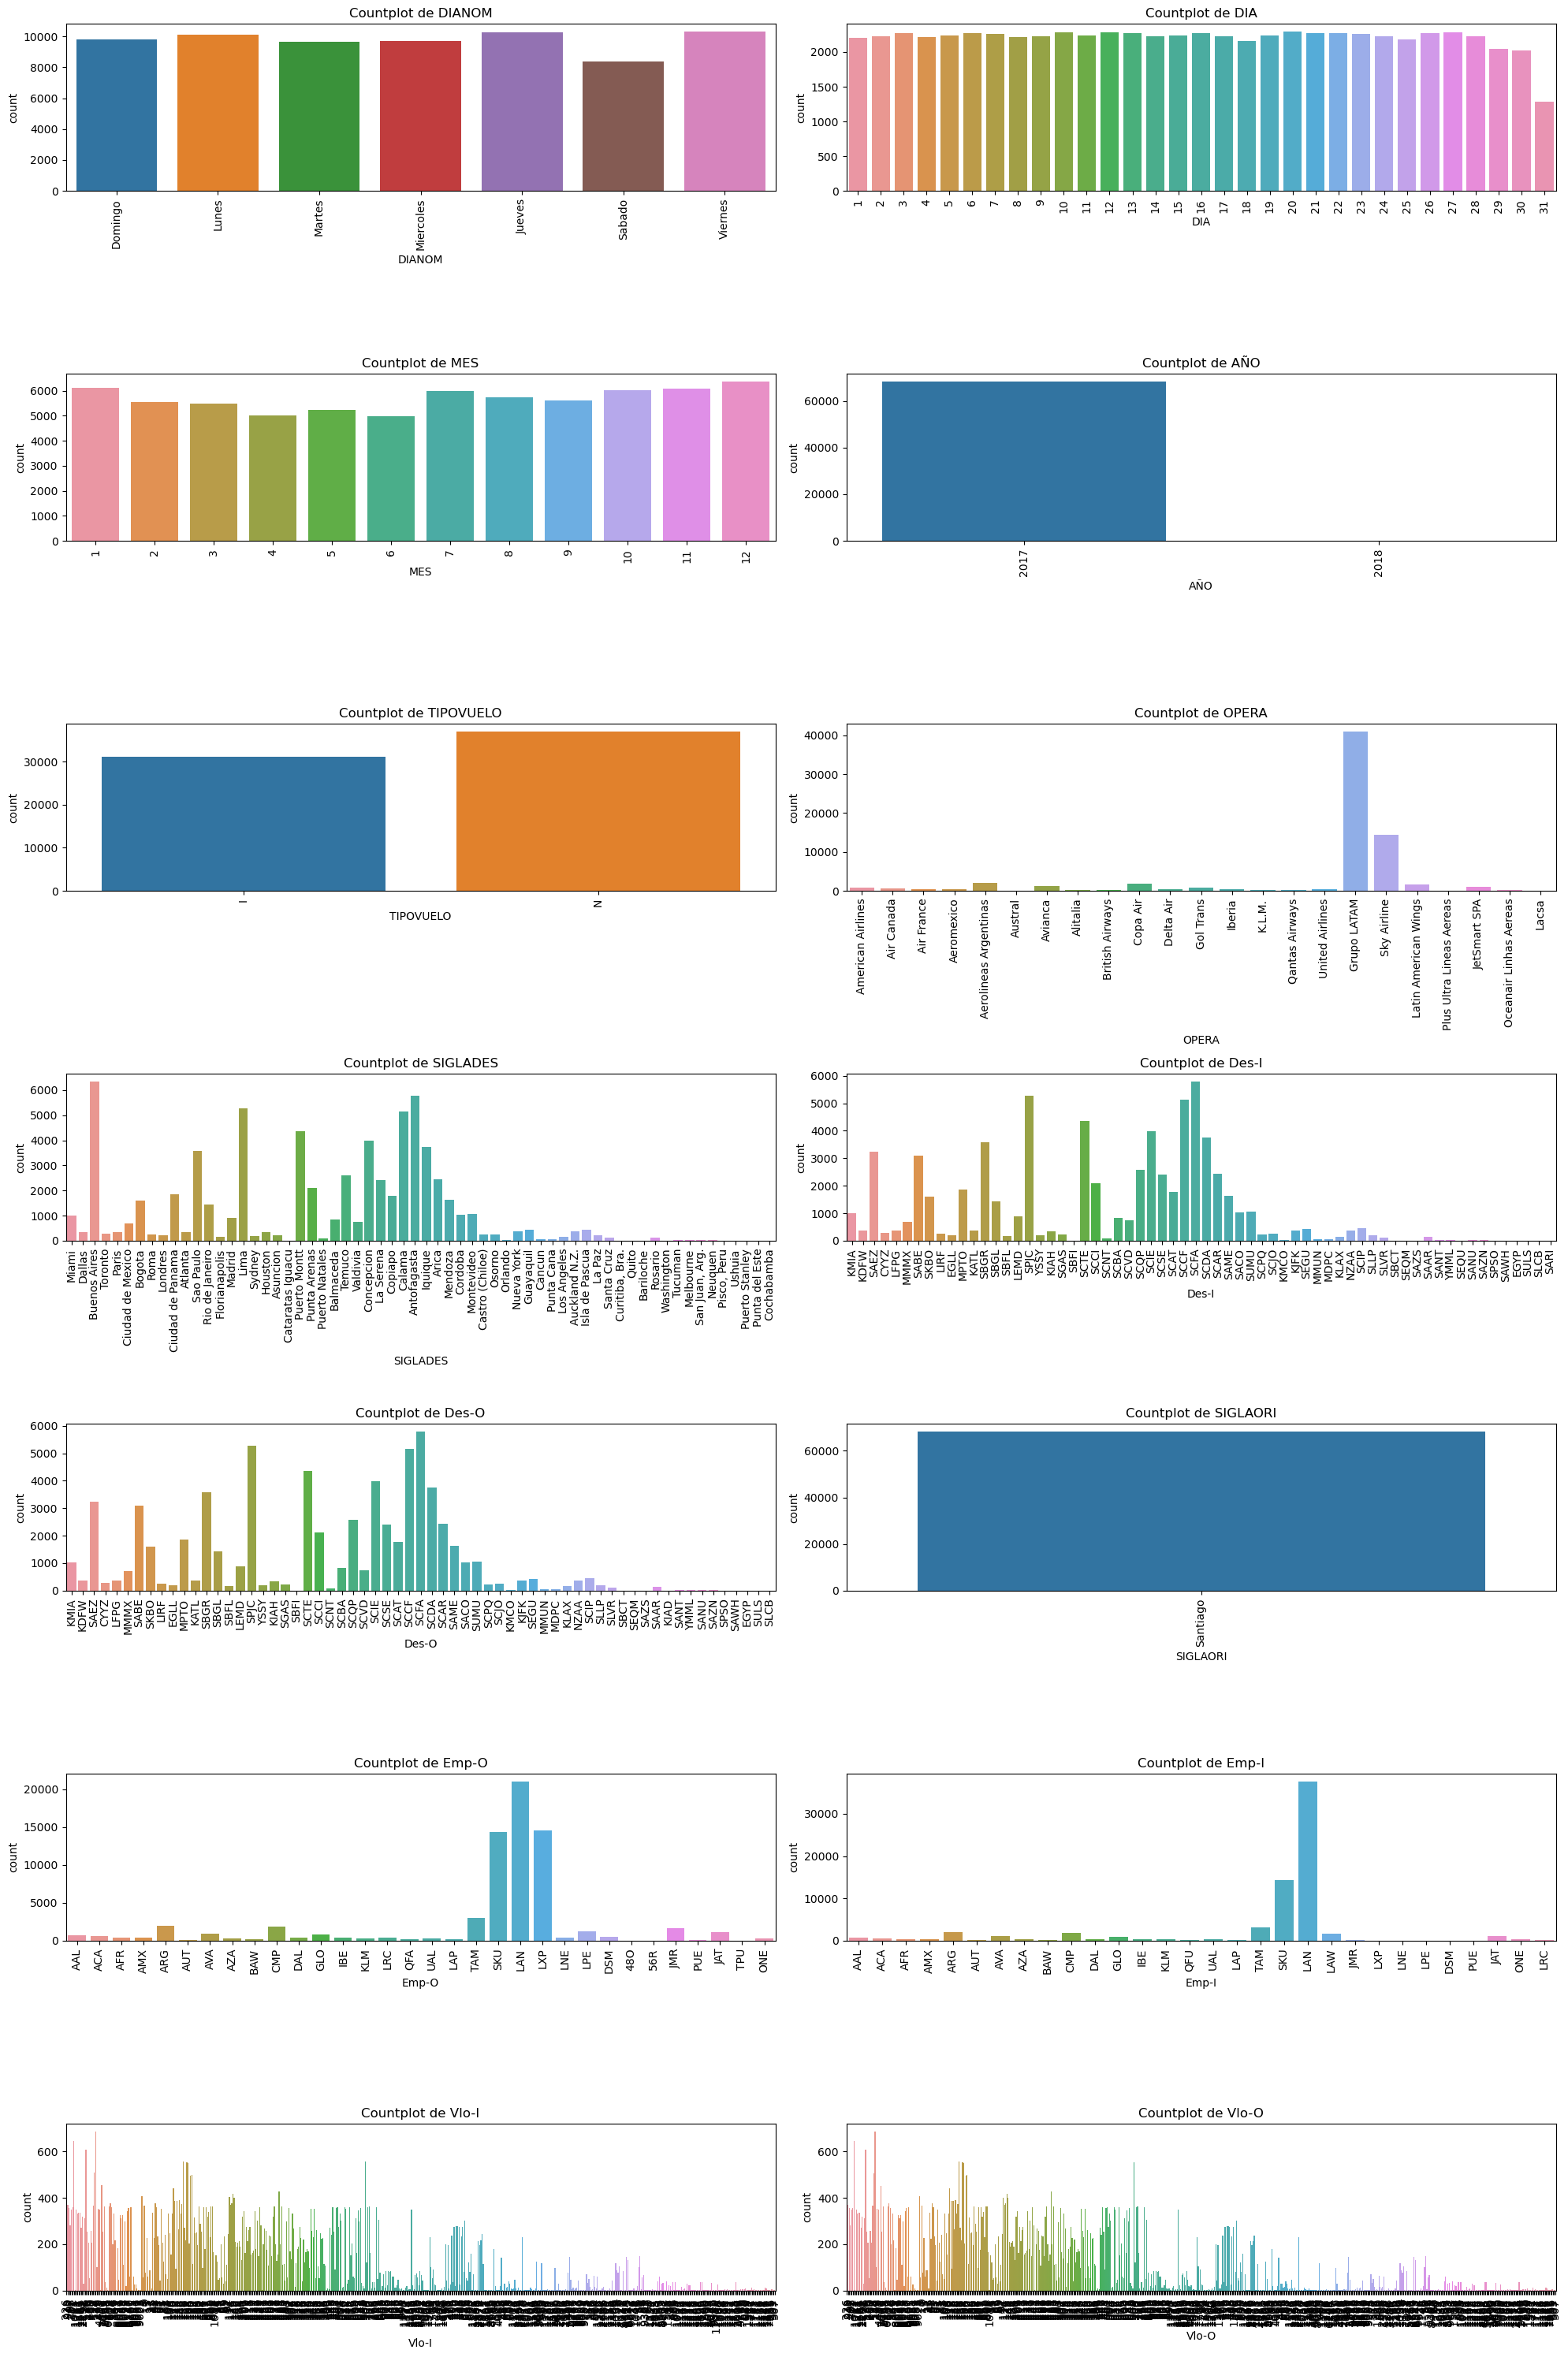

In [41]:
countplot(df2,variables,20,30)

In [15]:
#Se observa, que existen dos lineas que indican que el vuelo es año 2018, podría existir la posibilidad de eliminarlas.
df2[df2['AÑO']==2018]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
66918,2017-12-31 23:55:00,602,SCEL,KLAX,LAN,2018-01-01 00:02:00,602,SCEL,KLAX,LAN,1,1,2018,Lunes,I,Grupo LATAM,Santiago,Los Angeles
66947,2017-12-31 23:40:00,622,SCEL,MMMX,LAN,2018-01-01 00:12:00,622,SCEL,MMMX,LAN,1,1,2018,Lunes,I,Grupo LATAM,Santiago,Ciudad de Mexico


In [30]:
#Comparativa porcentual mercado nacional vs internacional
distribucion_porcentual(df2,['TIPOVUELO'])

Distribución porcentual de la variable 'TIPOVUELO':
N    54.198373
I    45.801627
Name: TIPOVUELO, dtype: float64


In [29]:
des = df2[df2['SIGLADES'] == 'Buenos Aires']
des['Des-I'].value_counts('%')

SAEZ    0.511444
SABE    0.488398
SEGU    0.000158
Name: Des-I, dtype: float64

## I) Analisis de datos base

- En primera instancia, podemos observar que las variables origin city code, es decir, 'Ori-I','Ori-O','SIGLAORI' son exactamente iguales, por lo que, en terminos de modelación se trabajará solo con una de las tres. De la misma forma, este caso casi se replica para las variables 'Des-O', 'Des-I', ya que, hay solo 28 líneas distintas entre las columnas Des-I y Des-O y además, esta última cuenta con un dato unico más, SARI, que está presente solo 1 vez en todo el set de datos.

- Con respecto las variables de tiempo, es decir, mes, año, día de la semana, día del mes tenemos los siguiente insights:
    - Existe un compartimiento de operacion de vuelo similar en los días de la semana a excepción de una leve baja durante el día sabado.
    - Se observa una disminución de la operacion de vuelo para los últimos días del mes, es decir, 29, 30 y 31. Este ultimo puede explicarse porque no todos los meses tienen 31.
    - Existe un aumento en la operación de vuelo en los meses de julio y agosto. De la misma forma, a contar del mes de octubre en adelante comienzan a incrementar esos mismos, bajando levemente en enero.
    - Será interesante observar eliminar 2 datos asociados al año 2018, ya que, no son representativos a la cantidad de data.  
    
- Con respecto a las operaciones de vuelo llevadas a cabo tenemos los siguiente observaciones:
    - Podemos observar que el mercado de vuelo se distribuye relativamente similar con respecto a operaciones de vuelo nacionales (54%) e internacionales (46%).
    - Las ciudades internacionales con mayor operacion de vuelo son Buenos Aires, Lima y Sao Paulo.
    - Las ciudades nacionales con mayor operacion de vuelo son Antofagasta, Calama y Concepción.
    - Todos los vuelos salen del mismo y unico origen, Santiago de Chile. En adición, se puede observar que el grupo LATAM opera el 60% de los vuelos, seguido por Sky Airline con un 21%.

## II) Creación de variables binarias

In [16]:
#Hacemos una copia del dataframe en el que estamos trabajando para cambiar el formato de fecha
df3 = df2.copy()
df3['Fecha-I'] = pd.to_datetime(df3['Fecha-I'])
df3['Fecha-O'] = pd.to_datetime(df3['Fecha-O'])


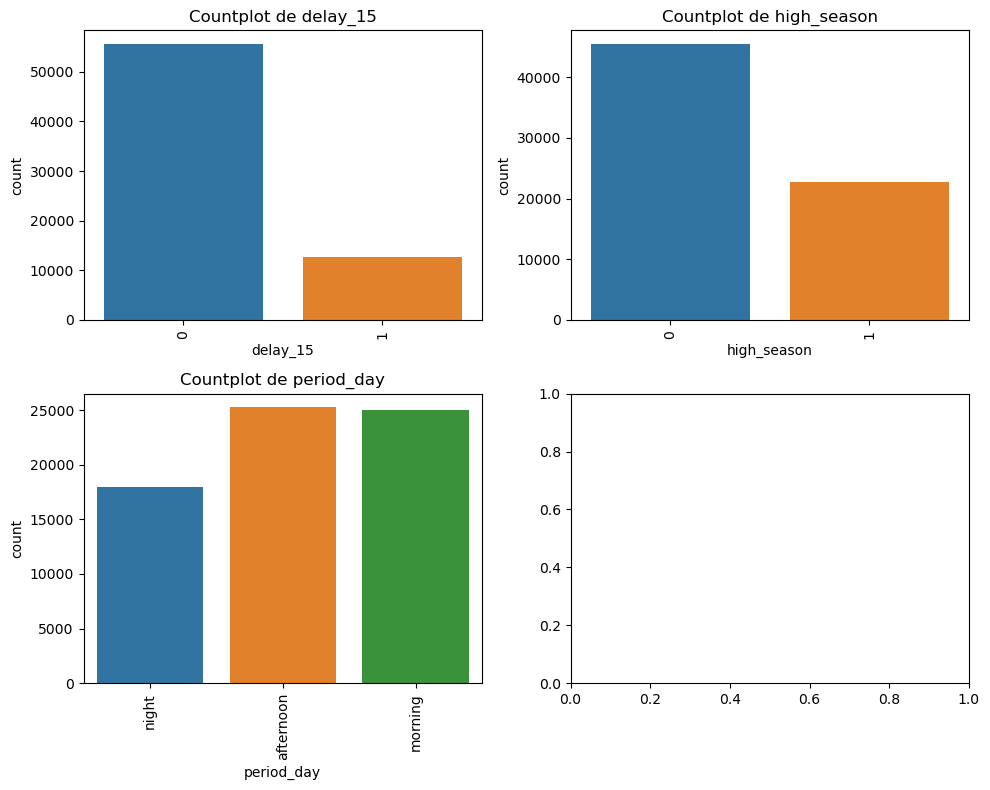

,DIA,MES,AÑO,min_diff,delay_15,high_season
count,45506.000000,45506.000000,45506.000000,45506.000000,45506.000000,45506.000000
mean,15.668373,6.793148,2017.000044,15.161803,0.277194,0.341867
std,8.713714,3.537023,0.006629,21.083542,0.447618,0.474340
min,1.000000,1.000000,2017.000000,1.000000,0.000000,0.000000
25%,8.000000,4.000000,2017.000000,4.000000,0.000000,0.000000
50%,16.000000,7.000000,2017.000000,8.000000,0.000000,0.000000
75%,23.000000,10.000000,2017.000000,17.000000,1.000000,1.000000
max,31.000000,12.000000,2018.000000,161.000000,1.000000,1.000000


In [40]:
#En este espacio se crearán las variables dummies

#Validador de temporada alta, la función se encuentra en el archivo funciones.py al igual que todas.
df3['high_season'] = df3['Fecha-I'].apply(validador_high_season)

#Variable entrega los minutos de diferencia entre la fecha de operacion de vuelo vs la agendada.
morning_i = time(5,0,0)
afternoon_i = time(12,0,0)
night_i = time(19,0,0)

df3['min_diff'] = (df3['Fecha-O'] - df3['Fecha-I']).dt.total_seconds() / 60

#Esta variable busca conocer si es que los minutos entre la operacion de vuelo y la agendada es mayor a 15 minutos.

df3['delay_15'] = np.where((df3['min_diff'] > 15),1,0)

#Esta variable me indica los periodos del día donde está operando un vuelo.

condiciones = [(df3['Fecha-O'].dt.time >= morning_i ) & (df3['Fecha-O'].dt.time < afternoon_i),(df3['Fecha-O'].dt.time >= afternoon_i  ) & (df3['Fecha-O'].dt.time < night_i)]

intervalos_period_day = ['morning', 'afternoon']

df3['period_day'] = np.select(condiciones, intervalos_period_day, default = 'night')

#Volvemos a graficar para conocer el estado de nuestras nuevas variables.
var_bin = ['delay_15','high_season','period_day']
countplot(df3,var_bin,10,8)
df3[df3['min_diff']>0].describe()



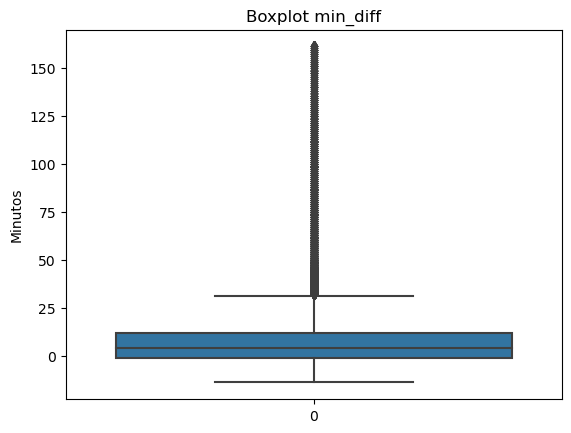

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

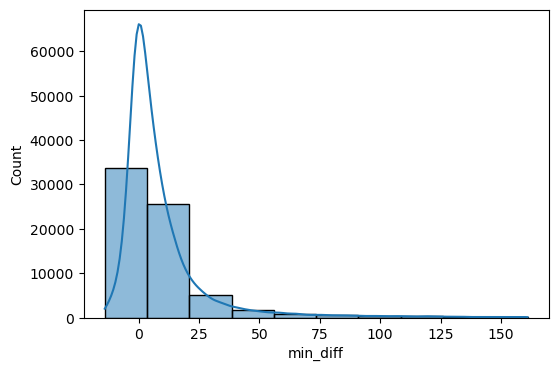

In [35]:
sns.boxplot(data=df3['min_diff'])

plt.title('Boxplot min_diff')
plt.ylabel('Minutos')

plt.show()

plt.figure(figsize=(6, 4)) 
media = np.mean(df3[df3['min_diff']>0])
sns.histplot(data=df3, x='min_diff', bins=10, kde=True) 
plt.axvline(x=media, color='red', linestyle='dashed', linewidth=2, label='Media')

plt.title('Histograma de min_diff')  
plt.xlabel('Valores')  
plt.ylabel('Frecuencia') 
plt.show() 

df3['min_diff'].describe()

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df3, x='high_season', y='min_diff')  
plt.title('Bar Plot con Hue')  
plt.xlabel('High_Season')  
plt.ylabel('min_diff') 
plt.show()





